<a href="https://colab.research.google.com/github/jvitorbarros15/B3-Stock-Clustering/blob/main/Brazilian_Stocks_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Project Goal

The goal of this project is to analyze and group stocks from the Brazilian stock exchange (B3) using unsupervised learning techniques — specifically KMeans clustering — based on key financial attributes such as:

- Market Capitalization
- Dividend Yield
- Beta (Volatility)
- Profit Margin
- Revenue Growth
- Annualized Return

By applying clustering, we aim to discover patterns between companies with similar risk-return profiles, industry behavior, and financial fundamentals. This analysis can support investment decision-making, portfolio diversification, and market segmentation.


In [ ]:
!pip install scikit-learn


# 1. Importing Required Libraries

In [ ]:
# Imports the essential libraries for data collection, processing, visualization, and clustering

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## 2. List of B3 Stock Tickers

In [ ]:
# Defines a list of B3 stock tickers, grouped by economic sector, to be used in the analysis.

tickers = [
    # Financials
    "ABEV3.SA", "AZUL4.SA", "B3SA3.SA", "BBSE3.SA", "BBDC3.SA", "BBDC4.SA",
    "BBAS3.SA", "BRAP4.SA", "BPAC11.SA", "ITSA4.SA", "ITUB4.SA", "SANB11.SA",
    # Energy & Utilities
    "CMIG4.SA", "CIEL3.SA", "CPLE6.SA", "CPFE3.SA", "CMIN3.SA", "ELET3.SA",
    "ELET6.SA", "EMBR3.SA", "ENGI11.SA", "ENEV3.SA", "EGIE3.SA", "EQTL3.SA",
    # Materials & Industrials
    "BRKM5.SA", "GGBR4.SA", "GOAU4.SA", "KLBN11.SA", "NTCO3.SA", "SOMA3.SA",
    "JBSS3.SA", "RENT3.SA", "LWSA3.SA", "MGLU3.SA", "MRFG3.SA", "BEEF3.SA",
    "MRVE3.SA", "MULT3.SA", "PCAR3.SA", "RADL3.SA", "RAIZ4.SA", "RDOR3.SA",
    "RAIL3.SA", "SBSP3.SA", "SMTO3.SA", "CSNA3.SA", "SLCE3.SA", "SUZB3.SA",
    "TAEE11.SA", "WEGE3.SA", "UGPA3.SA", "USIM5.SA",
    # Consumer & Retail
    "LREN3.SA", "VIVT3.SA", "TOTS3.SA", "PETZ3.SA", "CYRE3.SA", "DXCO3.SA",
    "FLRY3.SA", "EZTC3.SA", "CVCB3.SA",
    # Oil & Gas / Mining
    "PETR3.SA", "PETR4.SA", "RECV3.SA", "PRIO3.SA", "VALE3.SA",
    # Telecom / Tech
    "TIMS3.SA", "YDUQ3.SA"
]



stock_info = []

for t in tickers:
    try:
        ticker = yf.Ticker(t)
        info = ticker.info

        stock_info.append({
            'Ticker': t,
            'Name': info.get('longName'),
            'Sector': info.get('sector'),
            'Industry': info.get('industry'),
            'Market Cap': info.get('marketCap'),
            'Beta': info.get('beta'),
            "Dividend Yield": info.get("dividendYield"),
            "Profit Margin": info.get("profitMargins"),
            "Revenue Growth": info.get("revenueGrowth"),
        })
    except:
        print(f"Error fetching {t}")

import pandas as pd
df_info = pd.DataFrame(stock_info)
df_info.to_csv("brazil_stocks_info.csv", index=False)


In [ ]:
# Downloads historical price data for all valid tickers and computes daily returns and their mean values.

prices = yf.download(tickers, period="max")['Close']

prices = prices.dropna(axis=1, how="all")
returns = prices.pct_change().dropna()
mean_returns = returns.mean()

valid_tickers = prices.columns.tolist()
df_info = df_info[df_info['Ticker'].isin(valid_tickers)].copy()


df_info['Mean Daily Return'] = df_info['Ticker'].map(mean_returns)
df_info["Annualized Return"] = df_info["Mean Daily Return"] * 252



[*********************100%***********************]  68 of 68 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['CIEL3.SA', 'SOMA3.SA']: YFTzMissingError('possibly delisted; no timezone found')
<ipython-input-128-1786069807>:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


## 3. Saving and Reloading Processed Data



In [ ]:
df_info.to_csv("brazil_stocks_info_with_returns.csv", index=False)
df = pd.read_csv("brazil_stocks_info_with_returns.csv")
df

,Ticker,Name,Sector,Industry,Market Cap,Beta,Dividend Yield,Profit Margin,Revenue Growth,Mean Daily Return,Annualized Return
0,ABEV3.SA,Ambev S.A.,Consumer Defensive,Beverages - Brewers,2.125406e+11,0.352,6.77,0.15742,0.110,0.000062,0.015653
1,AZUL4.SA,Azul S.A.,Industrials,Airlines,9.333985e+08,1.329,NaN,-0.31852,0.153,-0.002657,-0.669548
2,B3SA3.SA,"B3 S.A. - Brasil, Bolsa, Balcão",Financial Services,Financial Data & Stock Exchanges,7.076150e+10,0.407,1.93,0.48895,0.075,0.000273,0.068772
3,BBSE3.SA,BB Seguridade Participações S.A.,Financial Services,Insurance - Diversified,6.965061e+10,0.375,13.07,0.84512,0.041,0.000987,0.248695
4,BBDC3.SA,Banco Bradesco S.A.,Financial Services,Banks - Regional,1.647413e+11,0.401,1.47,0.22405,0.265,0.000193,0.048606
...,...,...,...,...,...,...,...,...,...,...,...
61,RECV3.SA,Petroreconcavo S.A.,Energy,Oil & Gas E&P,4.563678e+09,0.055,5.78,0.16417,0.156,0.000614,0.154621
62,PRIO3.SA,Prio S.A.,Energy,Oil & Gas E&P,3.541405e+10,1.000,NaN,0.72614,0.388,0.001309,0.329887
63,VALE3.SA,Vale S.A.,Basic Materials,Other Industrial Metals & Mining,2.300872e+11,1.051,14.38,0.14875,0.132,-0.000166,-0.041766
64,TIMS3.SA,TIM S.A.,Communication Services,Telecom Services,5.091676e+10,0.299,6.11,0.13331,0.049,0.001103,0.277895


## 4. Data Cleaning & Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ticker             66 non-null     object 
 1   Name               66 non-null     object 
 2   Sector             66 non-null     object 
 3   Industry           66 non-null     object 
 4   Market Cap         66 non-null     float64
 5   Beta               66 non-null     float64
 6   Dividend Yield     58 non-null     float64
 7   Profit Margin      66 non-null     float64
 8   Revenue Growth     65 non-null     float64
 9   Mean Daily Return  66 non-null     float64
 10  Annualized Return  66 non-null     float64
dtypes: float64(7), object(4)
memory usage: 5.8+ KB


In [ ]:
df.isna().sum()

,0
Ticker,0
Name,0
Sector,0
Industry,0
Market Cap,0
Beta,0
Dividend Yield,8
Profit Margin,0
Revenue Growth,1
Mean Daily Return,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
Ticker,0
Name,0
Sector,0
Industry,0
Market Cap,0
Beta,0
Dividend Yield,0
Profit Margin,0
Revenue Growth,0
Mean Daily Return,0


In [ ]:
df['Industry']

,Industry
0,Beverages - Brewers
2,Financial Data & Stock Exchanges
3,Insurance - Diversified
4,Banks - Regional
5,Banks - Regional
6,Banks - Regional
8,Capital Markets
9,Conglomerates
10,Banks - Regional
11,Banks - Regional


In [ ]:
# Maps each industry to a numerical value, which is required for applying clustering algorithms like KMeans.

industry_to_id = {
    "Banks - Regional": 0,
    "Insurance - Diversified": 1,
    "Capital Markets": 2,
    "Financial Data & Stock Exchanges": 2,
    "Conglomerates": 3,
    "Utilities - Regulated Electric": 4,
    "Utilities - Renewable": 5,
    "Utilities - Diversified": 5,
    "Utilities - Regulated Water": 5,
    "Steel": 6,
    "Paper & Paper Products": 7,
    "Lumber & Wood Production": 7,
    "Electrical Equipment & Parts": 8,
    "Beverages - Brewers": 9,
    "Packaged Foods": 10,
    "Household & Personal Products": 10,
    "Farm Products": 10,
    "Oil & Gas Refining & Marketing": 11,
    "Oil & Gas Integrated": 11,
    "Oil & Gas E&P": 11,
    "Department Stores": 12,
    "Specialty Retail": 12,
    "Residential Construction": 13,
    "Real Estate - Development": 13,
    "Real Estate Services": 13,
    "Rental & Leasing Services": 13,
    "Telecom Services": 14,
    "Software - Application": 15,
    "Software - Infrastructure": 15,
    "Aerospace & Defense": 16,
    "Diagnostics & Research": 17,
    "Pharmaceutical Retailers": 17,
    "Medical Care Facilities": 17,
    "Specialty Chemicals": 18,
    "Other Industrial Metals & Mining": 19,
    "Railroads": 20,
    "Education & Training Services": 21
}
df['Industry'] = df['Industry'].astype(str).str.strip()

unique_industries = set(df['Industry'].unique())
mapped_industries = set(industry_to_id.keys())
missing = unique_industries - mapped_industries

if missing:
    print("⚠️ Missing industries in industry_to_id:", missing)
else:
    print("✅ All industries are mapped correctly.")

df['Industry'] = df['Industry'].map(industry_to_id)


✅ All industries are mapped correctly.


In [ ]:
df.to_csv("brazil_stocks_cluster_ready.csv", index=False)


In [ ]:

df.head()

,Ticker,Name,Sector,Industry,Market Cap,Beta,Dividend Yield,Profit Margin,Revenue Growth,Mean Daily Return,Annualized Return
0,ABEV3.SA,Ambev S.A.,Consumer Defensive,9,2.125406e+11,0.352,6.77,0.15742,0.110,0.000062,0.015653
2,B3SA3.SA,"B3 S.A. - Brasil, Bolsa, Balcão",Financial Services,2,7.076150e+10,0.407,1.93,0.48895,0.075,0.000273,0.068772
3,BBSE3.SA,BB Seguridade Participações S.A.,Financial Services,1,6.965061e+10,0.375,13.07,0.84512,0.041,0.000987,0.248695
4,BBDC3.SA,Banco Bradesco S.A.,Financial Services,0,1.647413e+11,0.401,1.47,0.22405,0.265,0.000193,0.048606
5,BBDC4.SA,Banco Bradesco S.A.,Financial Services,0,1.650955e+11,0.401,1.40,0.22405,0.265,0.000211,0.053179


## 5. Exploratory Data Analysis (EDA)

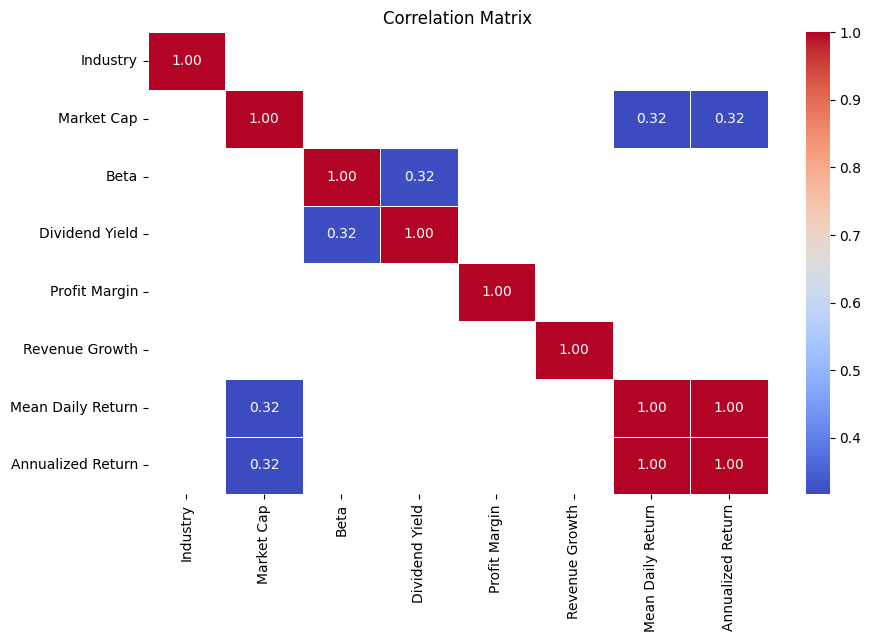

In [ ]:
# Generates and visualizes a correlation matrix to understand the relationships between financial variables.

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))

filtered = corr_matrix.mask(corr_matrix < 0.30)


sns.heatmap(filtered, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


plt.title("Correlation Matrix")
plt.show()

## 6. Feature Scaling

Standardizing Features

To ensure that all features contribute equally to the clustering algorithm, we apply standard scaling (z-score normalization).


In [ ]:

from sklearn.preprocessing import StandardScaler


features = df[['Industry','Market Cap', 'Beta', 'Dividend Yield', 'Annualized Return']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)



## 7. Using Elbow Method for Optimal Number of Clusters

The Elbow Method is used to estimate the ideal number of clusters (k) for KMeans clustering. It works by plotting the **inertia** (sum of squared distances from each point to its assigned cluster center) for different values of k.

As the number of clusters increases, the inertia naturally decreases. The goal is to identify the "elbow point" in the curve — the value of k after which the decrease in inertia slows down significantly. This point suggests the optimal trade-off between model simplicity and cluster separation.

This method provides an intuitive visual cue for selecting the right number of clusters before fitting the final KMeans model.

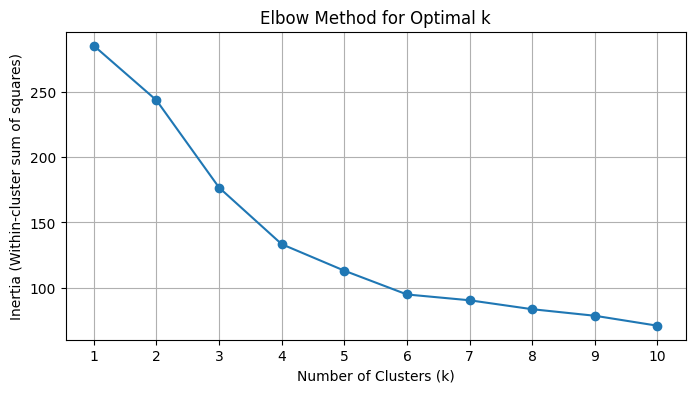

In [ ]:
# Applies the KMeans clustering algorithm to segment the stocks into groups with similar characteristics.

from sklearn.cluster import KMeans



inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

## 8. Interpreting Clusters

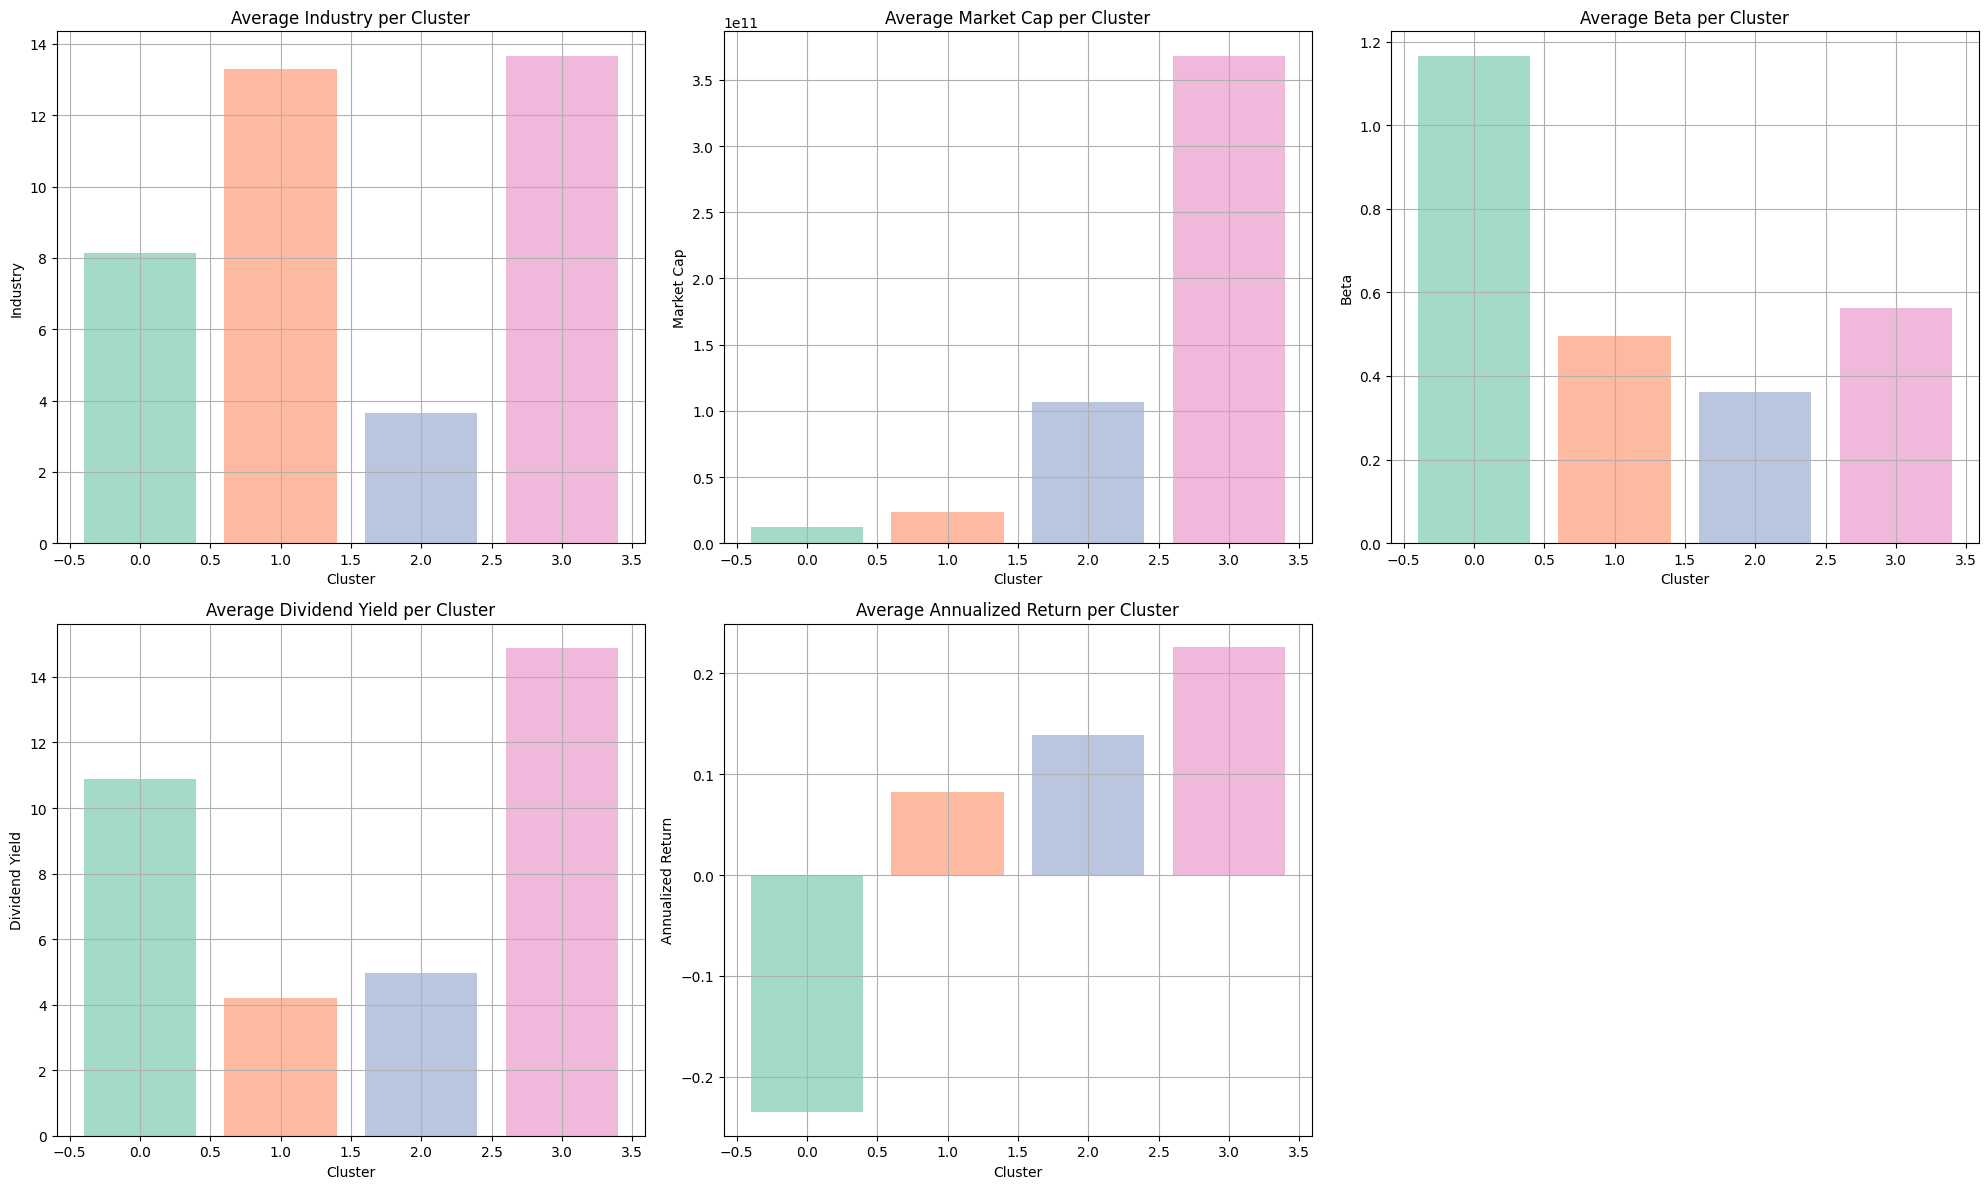

In [ ]:
# Generates 2D scatter plots for multiple feature combinations, colored by cluster, to help visually assess separation.

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 12))

for i, column in enumerate(features):
    df_plot = df.groupby('Cluster')[column].mean()
    ax = fig.add_subplot(2, 3, i+1)  # 2 linhas, 3 colunas de gráficos (ajuste conforme nº de features)

    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set2'), alpha=0.6)
    ax.set_title(f'Average {column} per Cluster', fontsize=12)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(column)
    ax.grid(True)

plt.tight_layout()
plt.show()


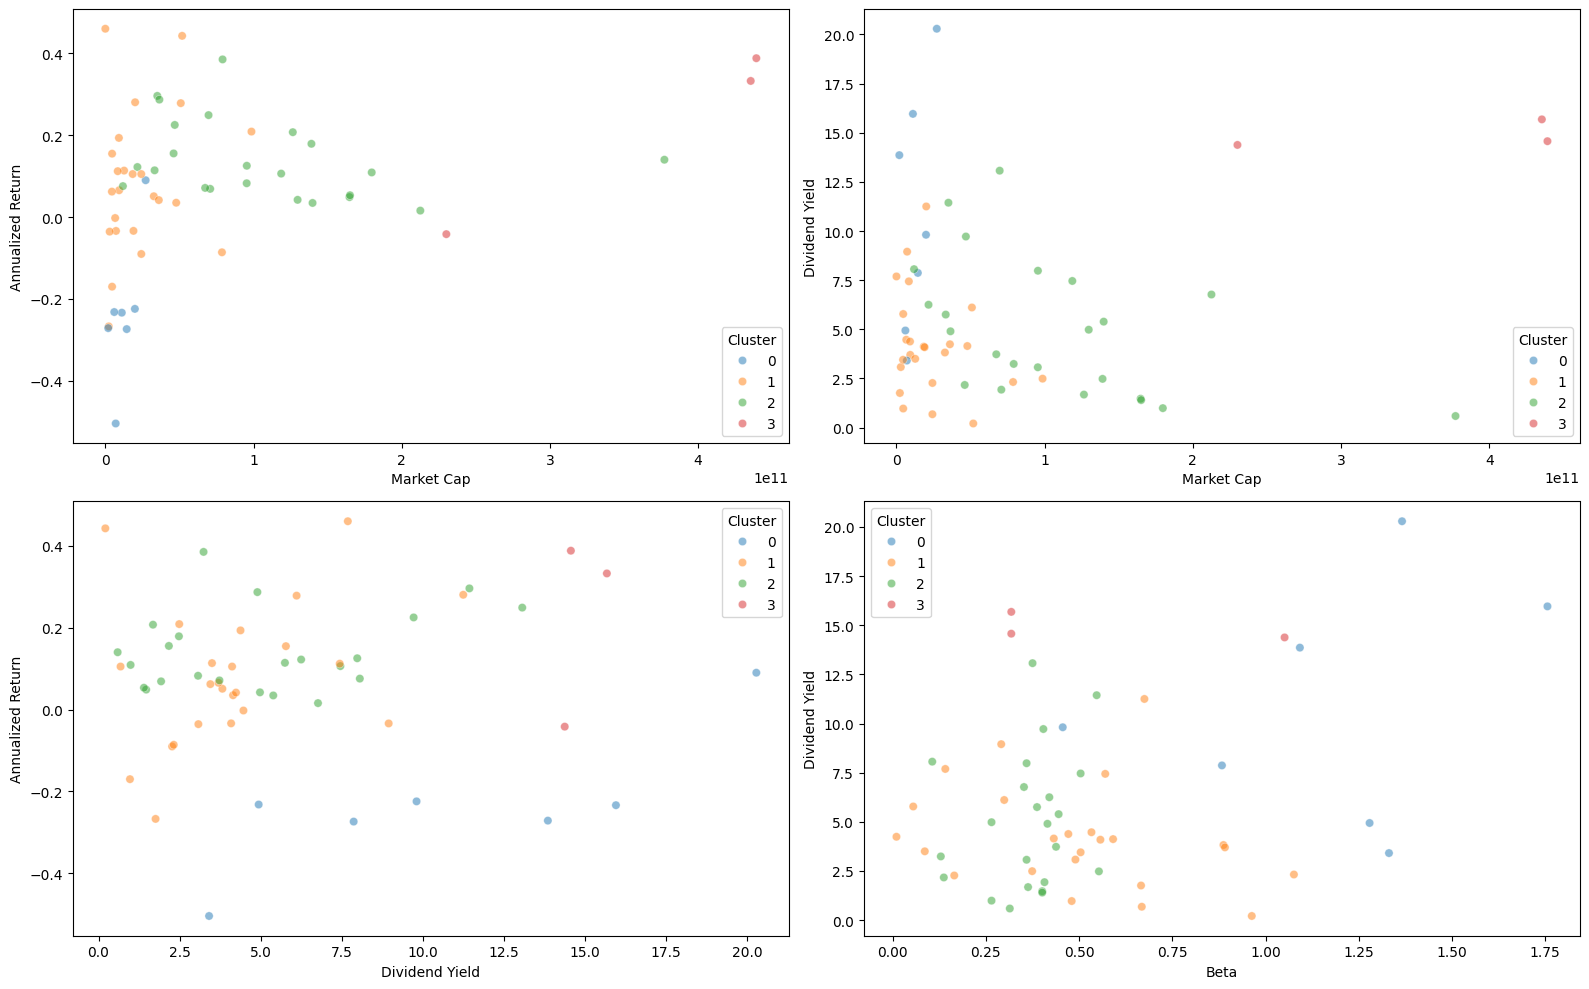

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

sns.scatterplot(x='Market Cap', y='Annualized Return', hue='Cluster', data=df, palette='tab10', alpha=0.5, ax=ax1)
sns.scatterplot(x='Market Cap', y='Dividend Yield', hue='Cluster', data=df, palette='tab10', alpha=0.5, ax=ax2)
sns.scatterplot(x='Dividend Yield', y='Annualized Return', hue='Cluster', data=df, palette='tab10', alpha=0.5, ax=ax3)
sns.scatterplot(x='Beta', y='Dividend Yield', hue='Cluster', data=df, palette='tab10', alpha=0.5, ax=ax4)

plt.tight_layout()
plt.show()


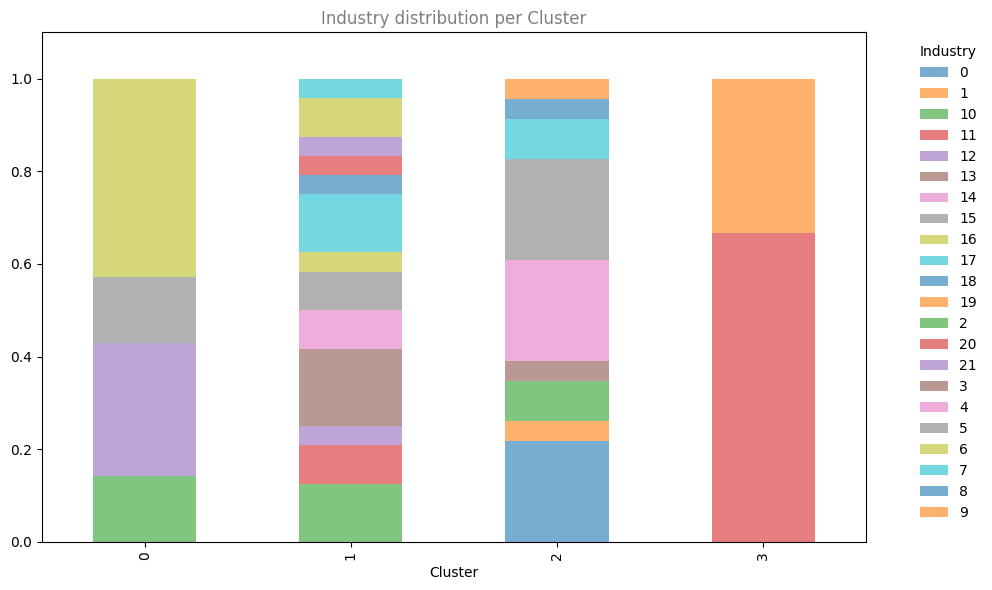

In [ ]:
import matplotlib.pyplot as plt


df['Industry_str'] = df['Industry'].astype(str)

fig = plt.figure(figsize=(10, 6))

plot_df = pd.crosstab(index=df['Cluster'], columns=df['Industry_str'], normalize='index')

ax = fig.add_subplot(1, 1, 1)
plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)

ax.set_title('Industry distribution per Cluster', alpha=0.5)
ax.set_ylim(0, 1.1)
ax.legend(title='Industry', frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()


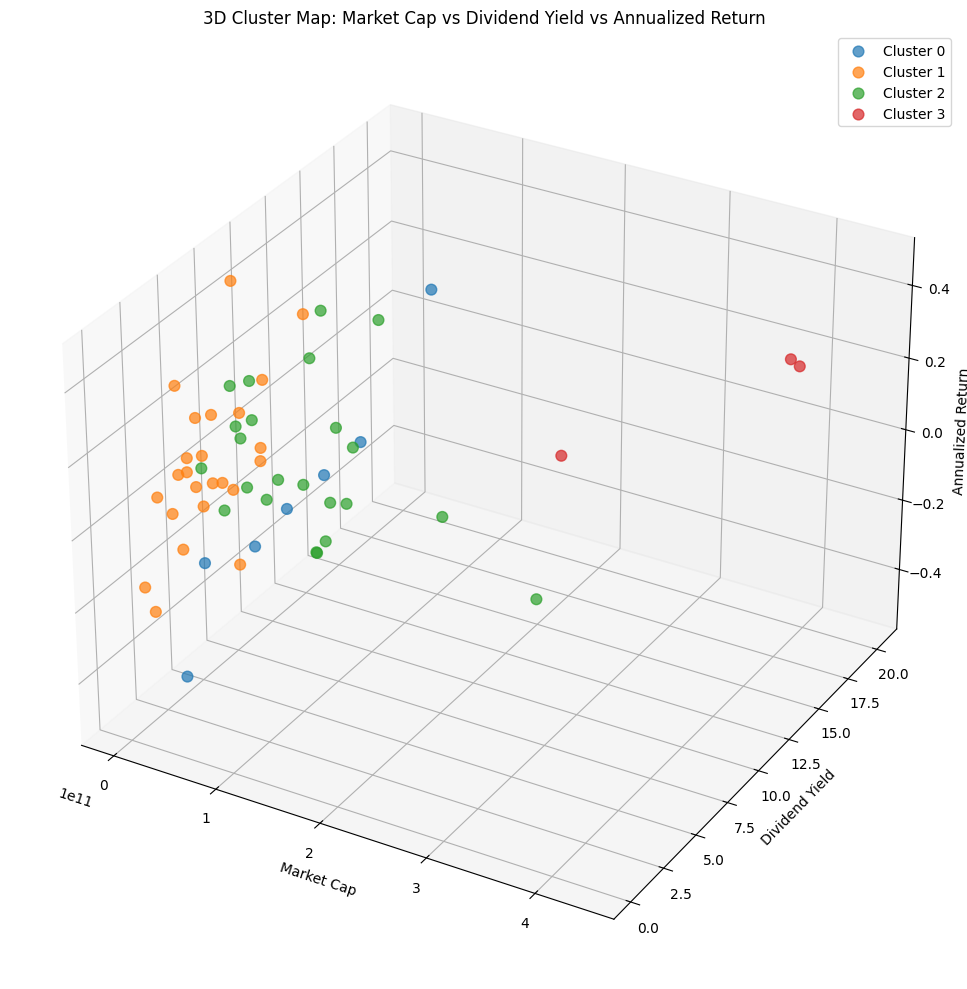

In [ ]:
# Creates a 3D scatter plot of Market Cap, Dividend Yield, and Annualized Return to explore cluster distributions more interactively.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

num_clusters = df['Cluster'].nunique()
colors = sns.color_palette("tab10", num_clusters)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster_id in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    ax.scatter(
        cluster_data['Market Cap'],
        cluster_data['Dividend Yield'],
        cluster_data['Annualized Return'],
        color=colors[cluster_id],
        label=f'Cluster {cluster_id}',
        alpha=0.7,
        s=60
    )


ax.set_xlabel('Market Cap')
ax.set_ylabel('Dividend Yield')
ax.set_zlabel('Annualized Return')
ax.set_title('3D Cluster Map: Market Cap vs Dividend Yield vs Annualized Return')
ax.legend()

plt.tight_layout()
plt.show()


## ✅ Final Analysis & Insights

After applying KMeans clustering to Brazilian stocks based on financial features such as Market Cap, Dividend Yield, Beta, and Annualized Return, we successfully segmented the dataset into distinct clusters.

### Key Observations:
- **Cluster 0**  
  Composed of companies with **high dividend yields**, **low annualized returns**, and **moderate to high volatility (beta)**.  
  These stocks likely represent **income-oriented firms**, typically mature and stable businesses offering regular payouts but limited capital appreciation.

- **Cluster 1**  
  Consists of stocks with **moderate dividend yields**, **steady returns**, **low market caps**, and **low beta**.  
  This group may include **smaller, stable-growth companies**, possibly from defensive sectors or early-stage growth firms with controlled risk.

- **Cluster 2**  
  Features companies with **low dividend yields**, **moderate to high returns**, **mid-sized market caps**, and **low volatility**.  
  These are likely **growth-focused companies**, reinvesting profits rather than distributing them, while maintaining lower risk profiles.

- **Cluster 3**  
  Made up of **very large market cap** companies with **strong dividend yields**, **high annualized returns**, and **moderate to high beta**.  

### Cluster Validity:
- The **Elbow Method** suggested an optimal number of clusters around **k = 4**, indicating that the segmentation is both interpretable and statistically meaningful.

### Business Implications:
- These clusters can help investors or analysts:
  - Tailor portfolios to risk profiles
  - Identify undervalued or overvalued groups
  - Understand market structure beyond sectors/industries

---

**Proposed improvements:**
- 🔍 **Expand the dataset** to include more stocks from the B3 exchange, especially from underrepresented sectors.
- 📊 **Incorporate more financial metrics** such as:
  - Price-to-Earnings (P/E)
  - Price-to-Book (P/B)
  - Return on Equity (ROE)
  - Earnings per Share (EPS)
- 🧠 **Try other clustering algorithms** (like DBSCAN or Agglomerative Clustering) to explore different grouping structures.
- ⏱️ **Integrate time-series features** like volatility over time or momentum-based returns.

The analysis serves as a solid foundation and proof-of-concept — but scaling it with a richer dataset will unlock deeper insights and more reliable segmentation.

